# Projeto de Previsão de Rotatividade de Funcionários (Attrition)

**Objetivo:** Construir um modelo de Machine Learning capaz de prever quais funcionários têm maior probabilidade de sair da empresa, permitindo ações preventivas de retenção.

<a id='1'></a>
## 1. Importação de Bibliotecas

Importação de todas as bibliotecas necessárias para análise, visualização e modelagem. 

In [441]:
# Manipulação de dados
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Configuração de estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Avaliação
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    roc_auc_score, precision_score, recall_score, f1_score, roc_curve
)

# Salvamento
import joblib
import json
from pathlib import Path

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 2. Carregamento e Análise Inicial dos Dados

O dataset foi carregado e realizada uma análise inicial para entender a estrutura dos dados.

In [442]:
# Carregar o dataset
df = pd.read_csv("../data/raw/rh_data.csv")  # AJUSTE O CAMINHO

print(f"\n📊 Formato da base: {df.shape}")
print(f"📊 Colunas: {df.columns.tolist()}")

df.head()


📊 Formato da base: (4410, 24)
📊 Colunas: ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [444]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [445]:
print("🔍 Valores nulos por coluna:\n")
print(df.isnull().sum().sort_values(ascending=False))

🔍 Valores nulos por coluna:

NumCompaniesWorked         19
TotalWorkingYears           9
Age                         0
Attrition                   0
DistanceFromHome            0
Education                   0
BusinessTravel              0
Department                  0
EmployeeCount               0
EducationField              0
JobLevel                    0
EmployeeID                  0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
Gender                      0
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


📊 Distribuição da variável alvo (Attrition):

Attrition
No     3699
Yes     711
Name: count, dtype: int64

📊 Proporção de Attrition:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


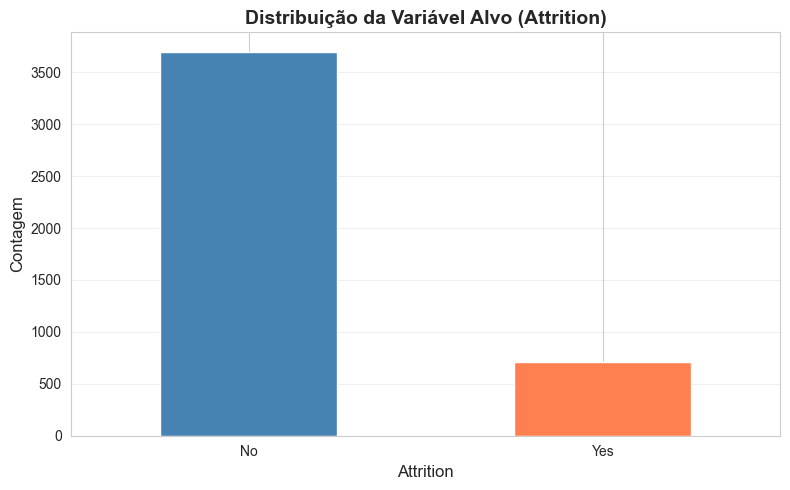

In [446]:
# Distribuição da variável alvo
print("📊 Distribuição da variável alvo (Attrition):\n")
print(df['Attrition'].value_counts())
print(f"\n📊 Proporção de Attrition:")
print(df['Attrition'].value_counts(normalize=True))

# Visualização
plt.figure(figsize=(8, 5))
df['Attrition'].value_counts().plot(kind='bar', color=['steelblue', 'coral'])
plt.title('Distribuição da Variável Alvo (Attrition)', fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Limpeza e Feature Engineering

In [447]:
# Identificar colunas constantes (todas as linhas têm o mesmo valor)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"🔍 Colunas constantes encontradas: {constant_cols}")

# Remover colunas constantes e identificadores
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

print(f"\n🗑️  Removendo colunas: {cols_to_drop}")
df.drop(columns=cols_to_drop, inplace=True)

print(f"\n✅ Formato após remoção: {df.shape}")

🔍 Colunas constantes encontradas: ['EmployeeCount', 'Over18', 'StandardHours']

🗑️  Removendo colunas: ['EmployeeCount', 'StandardHours', 'Over18']

✅ Formato após remoção: (4410, 21)


### 3.2. Tratamento de Valores Nulos

In [448]:
# Tratamento de valores nulos com lógica de negócio
print("🔧 Tratando valores nulos...\n")

# NumCompaniesWorked: Se nulo, assumimos que é o primeiro emprego (0)
if 'NumCompaniesWorked' in df.columns:
    nulls_before = df['NumCompaniesWorked'].isnull().sum()
    df['NumCompaniesWorked'].fillna(0, inplace=True)
    print(f"   - NumCompaniesWorked: {nulls_before} nulos preenchidos com 0")

# TotalWorkingYears: Se nulo, assumimos que é o primeiro emprego (0)
if 'TotalWorkingYears' in df.columns:
    nulls_before = df['TotalWorkingYears'].isnull().sum()
    df['TotalWorkingYears'].fillna(0, inplace=True)
    print(f"   - TotalWorkingYears: {nulls_before} nulos preenchidos com 0")

print(f"\n✅ Valores nulos restantes: {df.isnull().sum().sum()}")

🔧 Tratando valores nulos...

   - NumCompaniesWorked: 19 nulos preenchidos com 0
   - TotalWorkingYears: 9 nulos preenchidos com 0

✅ Valores nulos restantes: 0


### 3.3. Feature Engineering (Criação de Novas Variáveis)

Foram criadas 8 novas variáveis que capturam relações complexas entre os dados originais.

In [449]:
print("🔧 Criando novas variáveis (Feature Engineering)...\n")

# 1. Faixa etária (AgeGroup)
df['AgeGroup'] = pd.cut(
    df['Age'], 
    bins=[18, 30, 40, 50, 60], 
    labels=['18-30', '31-40', '41-50', '51-60']
)
print("   ✅ AgeGroup criada")

# 2. Proporção de tempo na empresa atual vs. carreira total
df['CompanyExperienceRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)
print("   ✅ CompanyExperienceRatio criada")

# 3. Tempo médio por empresa
df['AvgYearsPerCompany'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)
print("   ✅ AvgYearsPerCompany criada")

# 4. Taxa de promoção (quanto tempo sem promoção em relação ao tempo total)
df['PromotionRate'] = df['YearsSinceLastPromotion'] / (df['TotalWorkingYears'] + 1)
print("   ✅ PromotionRate criada")

# 5. Distância de casa acima da mediana (binária)
df['FarFromHome'] = (df['DistanceFromHome'] > df['DistanceFromHome'].median()).astype(int)
print("   ✅ FarFromHome criada")

# 6. Experiência em múltiplas empresas (binária)
df['MultiCompanyExp'] = (df['NumCompaniesWorked'] > 3).astype(int)
print("   ✅ MultiCompanyExp criada")

# 7. Muito tempo sem promoção (binária)
df['LongTimeNoPromotion'] = (df['YearsSinceLastPromotion'] > 5).astype(int)
print("   ✅ LongTimeNoPromotion criada")

# 8. Categoria de renda (quartis)
df['IncomeGroup'] = pd.qcut(
    df['MonthlyIncome'], 
    q=4, 
    labels=['Baixo', 'Médio', 'Alto', 'Muito Alto']
)
print("   ✅ IncomeGroup criada")

print(f"\n✅ Feature Engineering concluída! Formato atual: {df.shape}")

🔧 Criando novas variáveis (Feature Engineering)...

   ✅ AgeGroup criada
   ✅ CompanyExperienceRatio criada
   ✅ AvgYearsPerCompany criada
   ✅ PromotionRate criada
   ✅ FarFromHome criada
   ✅ MultiCompanyExp criada
   ✅ LongTimeNoPromotion criada
   ✅ IncomeGroup criada

✅ Feature Engineering concluída! Formato atual: (4410, 29)


## 4. Análise Exploratória de Dados (EDA)

Analisadas as relações entre as variáveis e a variável alvo (Attrition).

In [450]:
# Comparar médias das variáveis numéricas entre quem saiu (Yes) e ficou (No)
print("📊 Comparação de médias entre grupos (Attrition = Yes vs. No):\n")

# Transformar Attrition temporariamente para análise
df_temp = df.copy()
df_temp['Attrition_num'] = df_temp['Attrition'].map({'Yes': 1, 'No': 0})

comparison = df_temp.groupby('Attrition').mean(numeric_only=True)
print(comparison.T.sort_values(by='Yes', ascending=False).head(15))

📊 Comparação de médias entre grupos (Attrition = Yes vs. No):

Attrition                          No           Yes
MonthlyIncome            65672.595296  61682.616034
EmployeeID                2208.139497   2191.767932
Age                         37.561233     33.607595
PercentSalaryHike           15.157340     15.481013
DistanceFromHome             9.227088      9.012658
TotalWorkingYears           11.838335      8.232068
YearsAtCompany               7.369019      5.130802
NumCompaniesWorked           2.637740      2.919831
Education                    2.919708      2.877637
YearsWithCurrManager         4.367397      2.852321
AvgYearsPerCompany           4.466295      2.828814
TrainingTimesLastYear        2.827251      2.654008
JobLevel                     2.068938      2.037975
YearsSinceLastPromotion      2.234388      1.945148
Attrition_num                0.000000      1.000000


📊 Taxa de Attrition por Departamento:

Department
Human Resources           0.301587
Research & Development    0.157128
Sales                     0.150224
Name: Attrition, dtype: float64


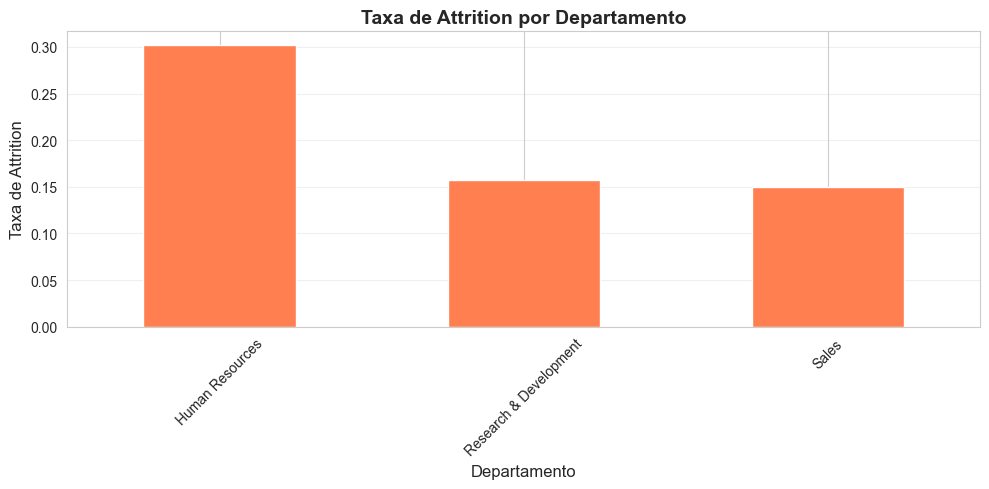

In [451]:
# Análise de attrition por departamento
print("📊 Taxa de Attrition por Departamento:\n")
attrition_by_dept = df.groupby('Department')['Attrition'].apply(
    lambda x: (x == 'Yes').mean()
).sort_values(ascending=False)
print(attrition_by_dept)

# Visualização
plt.figure(figsize=(10, 5))
attrition_by_dept.plot(kind='bar', color='coral')
plt.title('Taxa de Attrition por Departamento', fontsize=14, fontweight='bold')
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Taxa de Attrition', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

📊 Taxa de Attrition por Cargo (Top 10):

JobRole
Research Director            0.237500
Research Scientist           0.181507
Sales Executive              0.168712
Laboratory Technician        0.162162
Healthcare Representative    0.145038
Sales Representative         0.144578
Manager                      0.137255
Human Resources              0.134615
Manufacturing Director       0.110345
Name: Attrition, dtype: float64


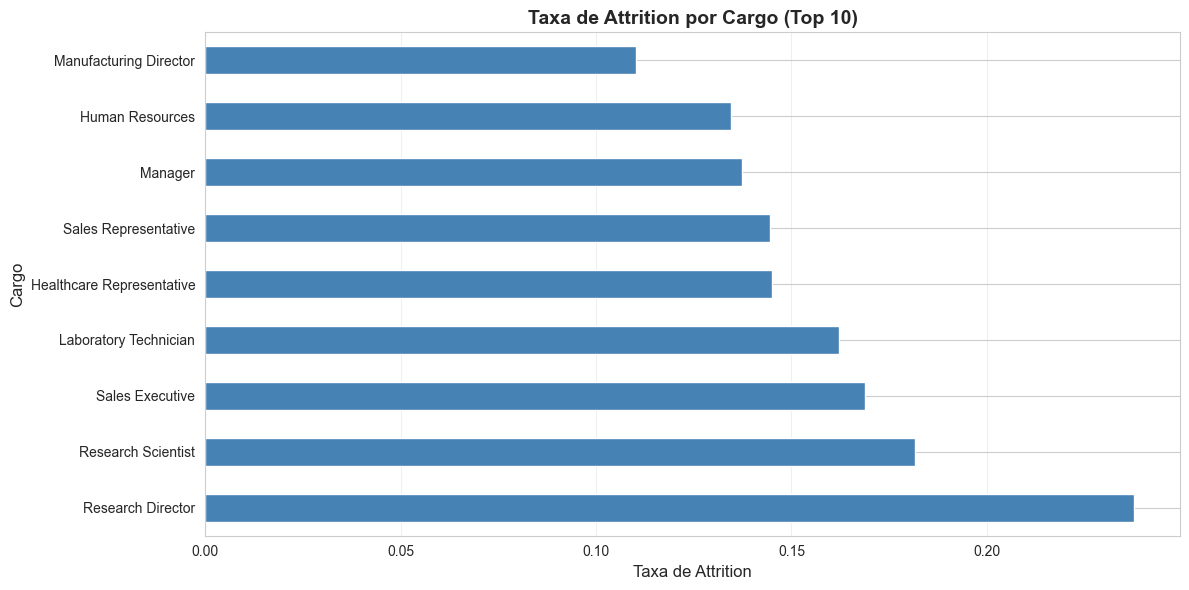

In [452]:
# Análise de attrition por cargo (JobRole)
print("📊 Taxa de Attrition por Cargo (Top 10):\n")
attrition_by_role = df.groupby('JobRole')['Attrition'].apply(
    lambda x: (x == 'Yes').mean()
).sort_values(ascending=False).head(10)
print(attrition_by_role)

# Visualização
plt.figure(figsize=(12, 6))
attrition_by_role.plot(kind='barh', color='steelblue')
plt.title('Taxa de Attrition por Cargo (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Taxa de Attrition', fontsize=12)
plt.ylabel('Cargo', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

📊 Correlação entre variáveis numéricas e Attrition:

Attrition                  1.000000
MultiCompanyExp            0.045318
NumCompaniesWorked         0.041503
PercentSalaryHike          0.032533
PromotionRate              0.013086
FarFromHome                0.003516
LongTimeNoPromotion        0.001763
EmployeeID                -0.004729
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
MonthlyIncome             -0.031176
YearsSinceLastPromotion   -0.033019
TrainingTimesLastYear     -0.049431
Name: Attrition, dtype: float64


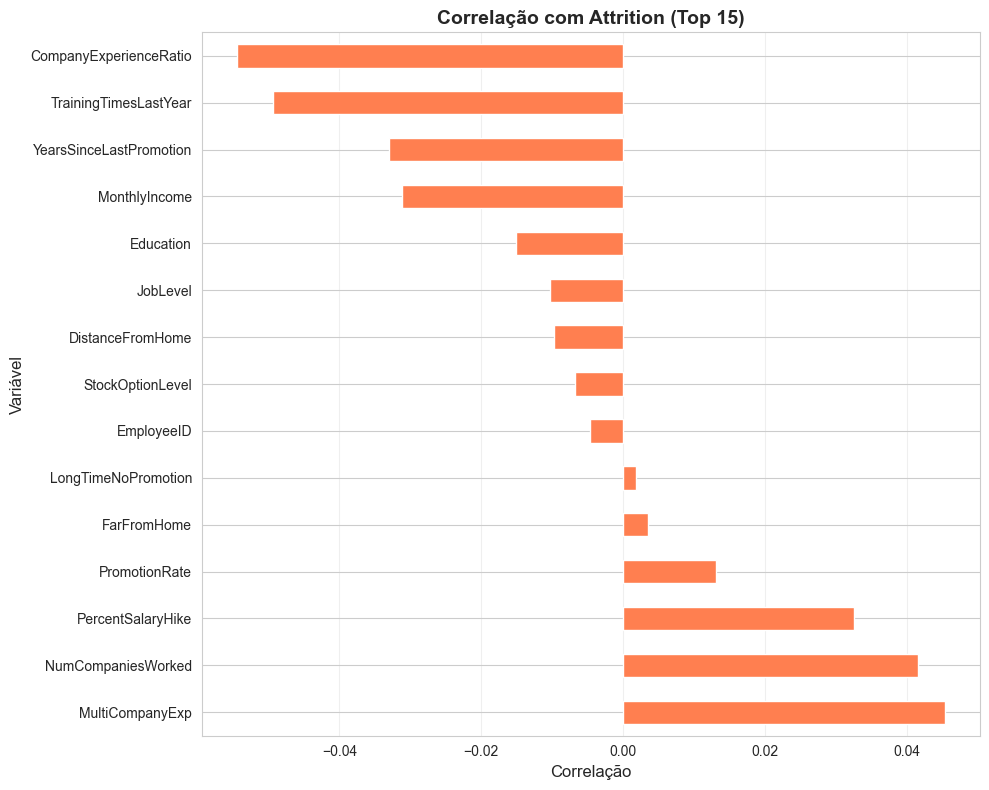

In [453]:
# Correlação entre variáveis numéricas
print("📊 Correlação entre variáveis numéricas e Attrition:\n")

# Criar cópia temporária com Attrition numérica
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Calcular correlação
correlation = df_corr.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(correlation.head(15))

# Visualização
plt.figure(figsize=(10, 8))
correlation.drop('Attrition').head(15).plot(kind='barh', color='coral')
plt.title('Correlação com Attrition (Top 15)', fontsize=14, fontweight='bold')
plt.xlabel('Correlação', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

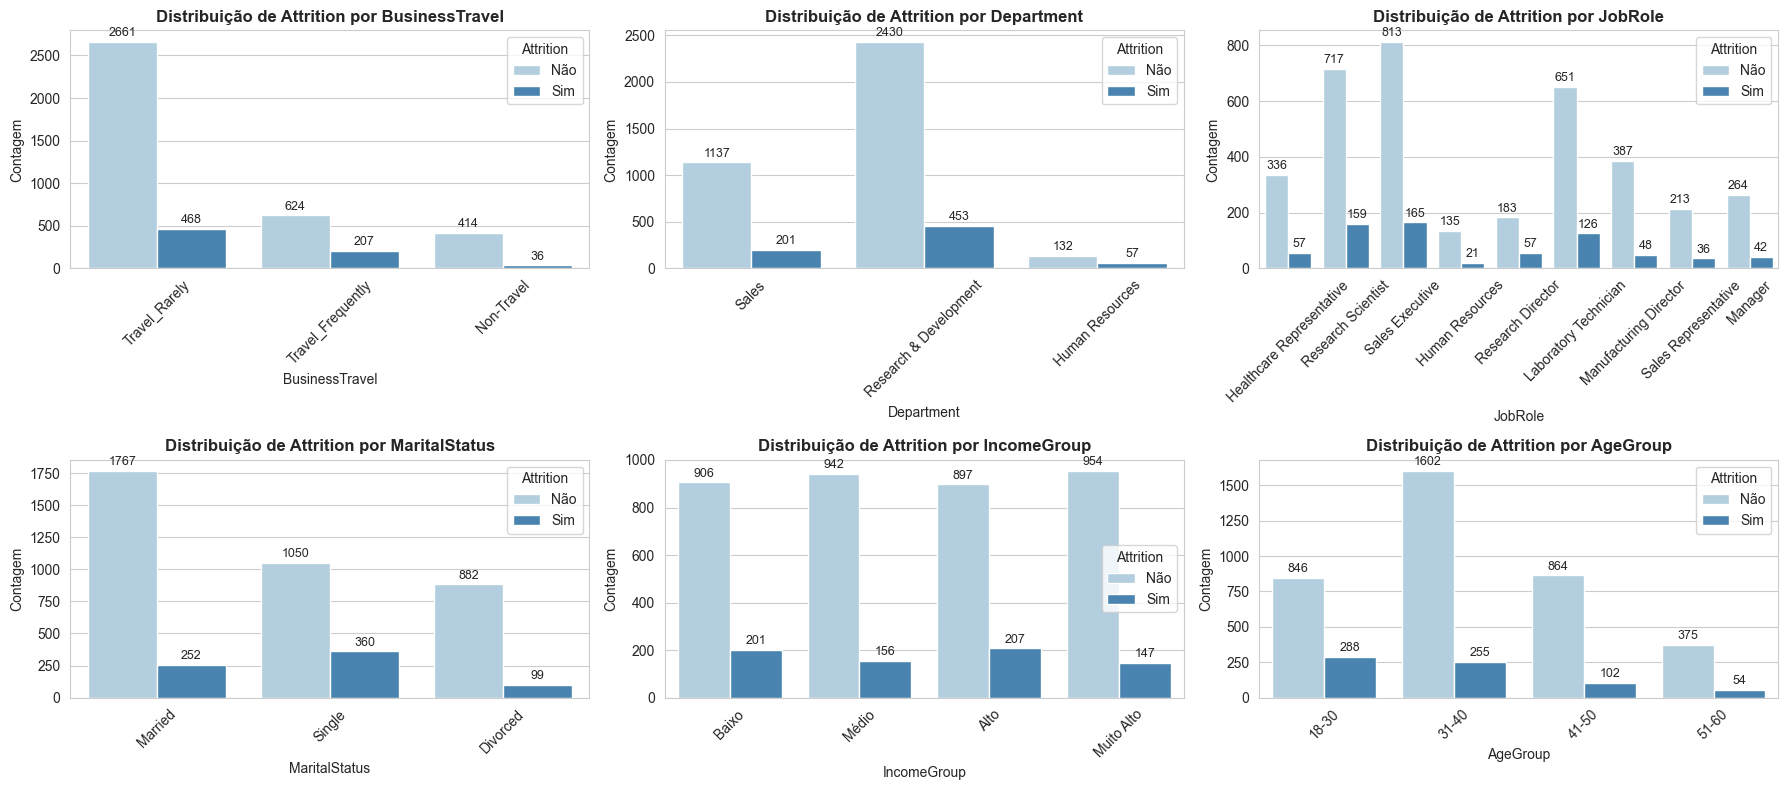

In [454]:
# Lista de variáveis categóricas
categorical_cols = ['BusinessTravel', 'Department',
                    'JobRole', 'MaritalStatus', 
                    'IncomeGroup', 'AgeGroup']

# Define número de colunas e linhas
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Cria a figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Loop pelas variáveis categóricas
for i, col in enumerate(categorical_cols):
    ax = sns.countplot(data=df, x=col, hue='Attrition', palette='Blues', ax=axes[i])
    ax.set_title(f"Distribuição de Attrition por {col}", fontsize=12, fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Contagem")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Attrition', labels=['Não', 'Sim'])
    
    # Adiciona rótulos percentuais
    total = len(df)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=2)
    
# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4.1. Aplicar Medidas de Tendência Central

In [455]:
# Selecionar apenas colunas numéricas relevantes para análise de tendência central
numeric_cols = [
    'Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'StockOptionLevel', 'JobLevel', 'AvgYearsPerCompany',
    'PromotionRate', 'FarFromHome', 'MultiCompanyExp', 'CompanyExperienceRatio', 'LongTimeNoPromotion'
]

In [456]:
central_tendency_dic = {}

for col in numeric_cols:
    if col in df.columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()
        mode_val = mode.iloc[0] if not mode.empty else None
        std_dev = df[col].std()
        central_tendency_dic[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode_val,
            'Standard Deviation': std_dev
        }

df_central_tendency_dic = pd.DataFrame(central_tendency_dic).T
df_central_tendency_dic

,Mean,Median,Mode,Standard Deviation
Age,36.923810,36.000000,35.0,9.133301
DistanceFromHome,9.192517,7.000000,2.0,8.105026
Education,2.912925,3.000000,3.0,1.023933
MonthlyIncome,65029.312925,49190.000000,23420.0,47068.888559
NumCompaniesWorked,2.683220,2.000000,1.0,2.499737
PercentSalaryHike,15.209524,14.000000,11.0,3.659108
TotalWorkingYears,11.256916,10.000000,10.0,7.790928
TrainingTimesLastYear,2.799320,3.000000,2.0,1.288978
YearsAtCompany,7.008163,5.000000,5.0,6.125135
YearsSinceLastPromotion,2.187755,1.000000,0.0,3.221699


#### Boxplot

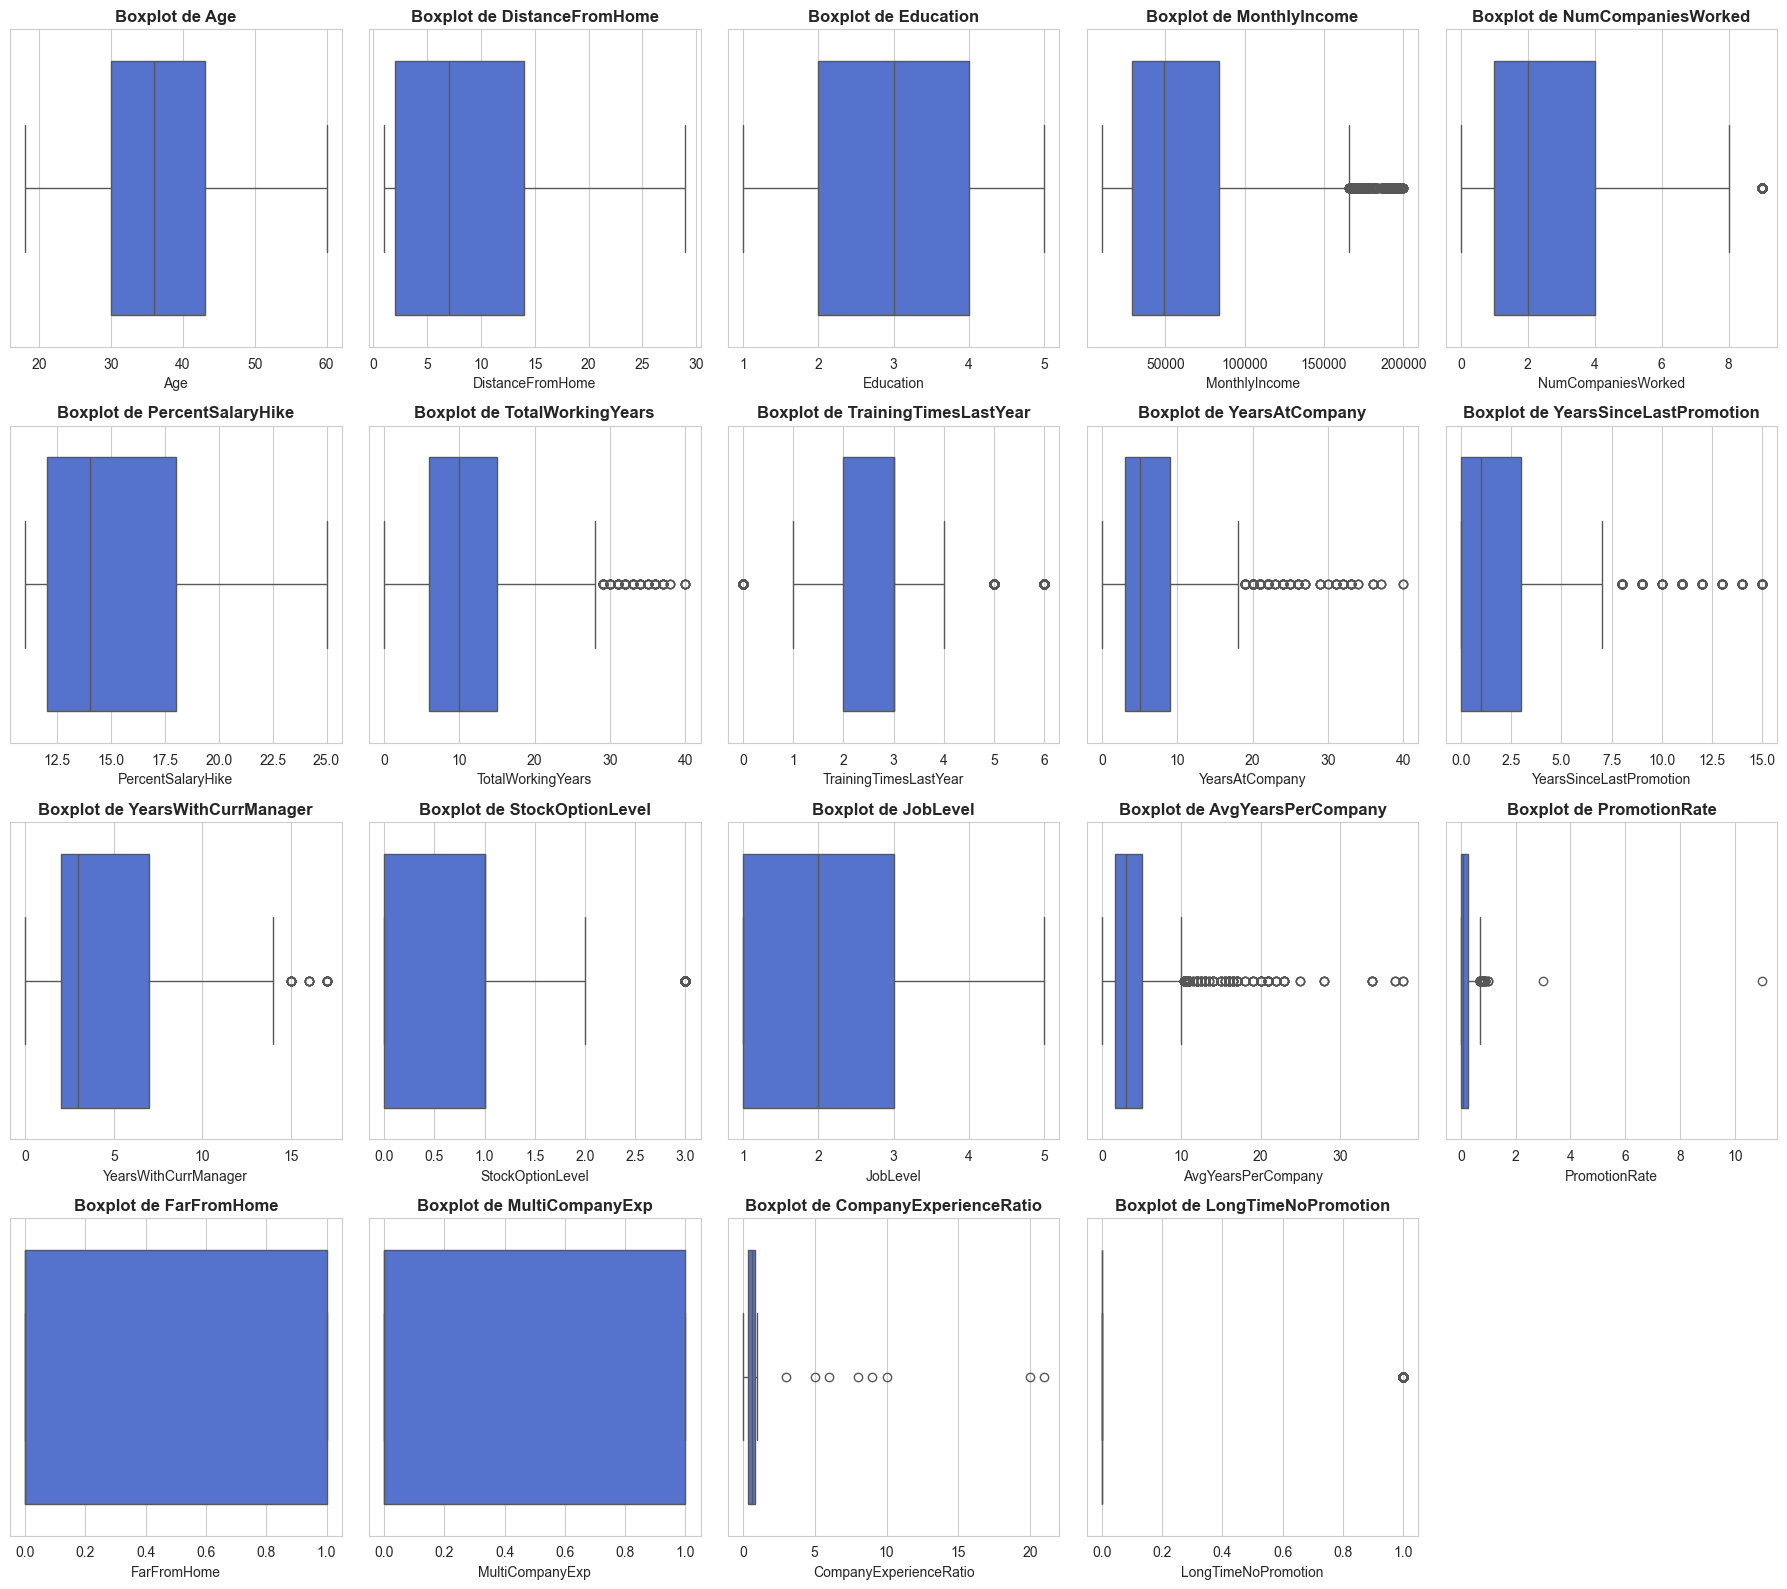

In [457]:
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        sns.boxplot(x=df[col], color="royalblue", ax=axes[i])
        axes[i].set_title(f"Boxplot de {col}", fontsize=12, fontweight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("")

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Histogramas

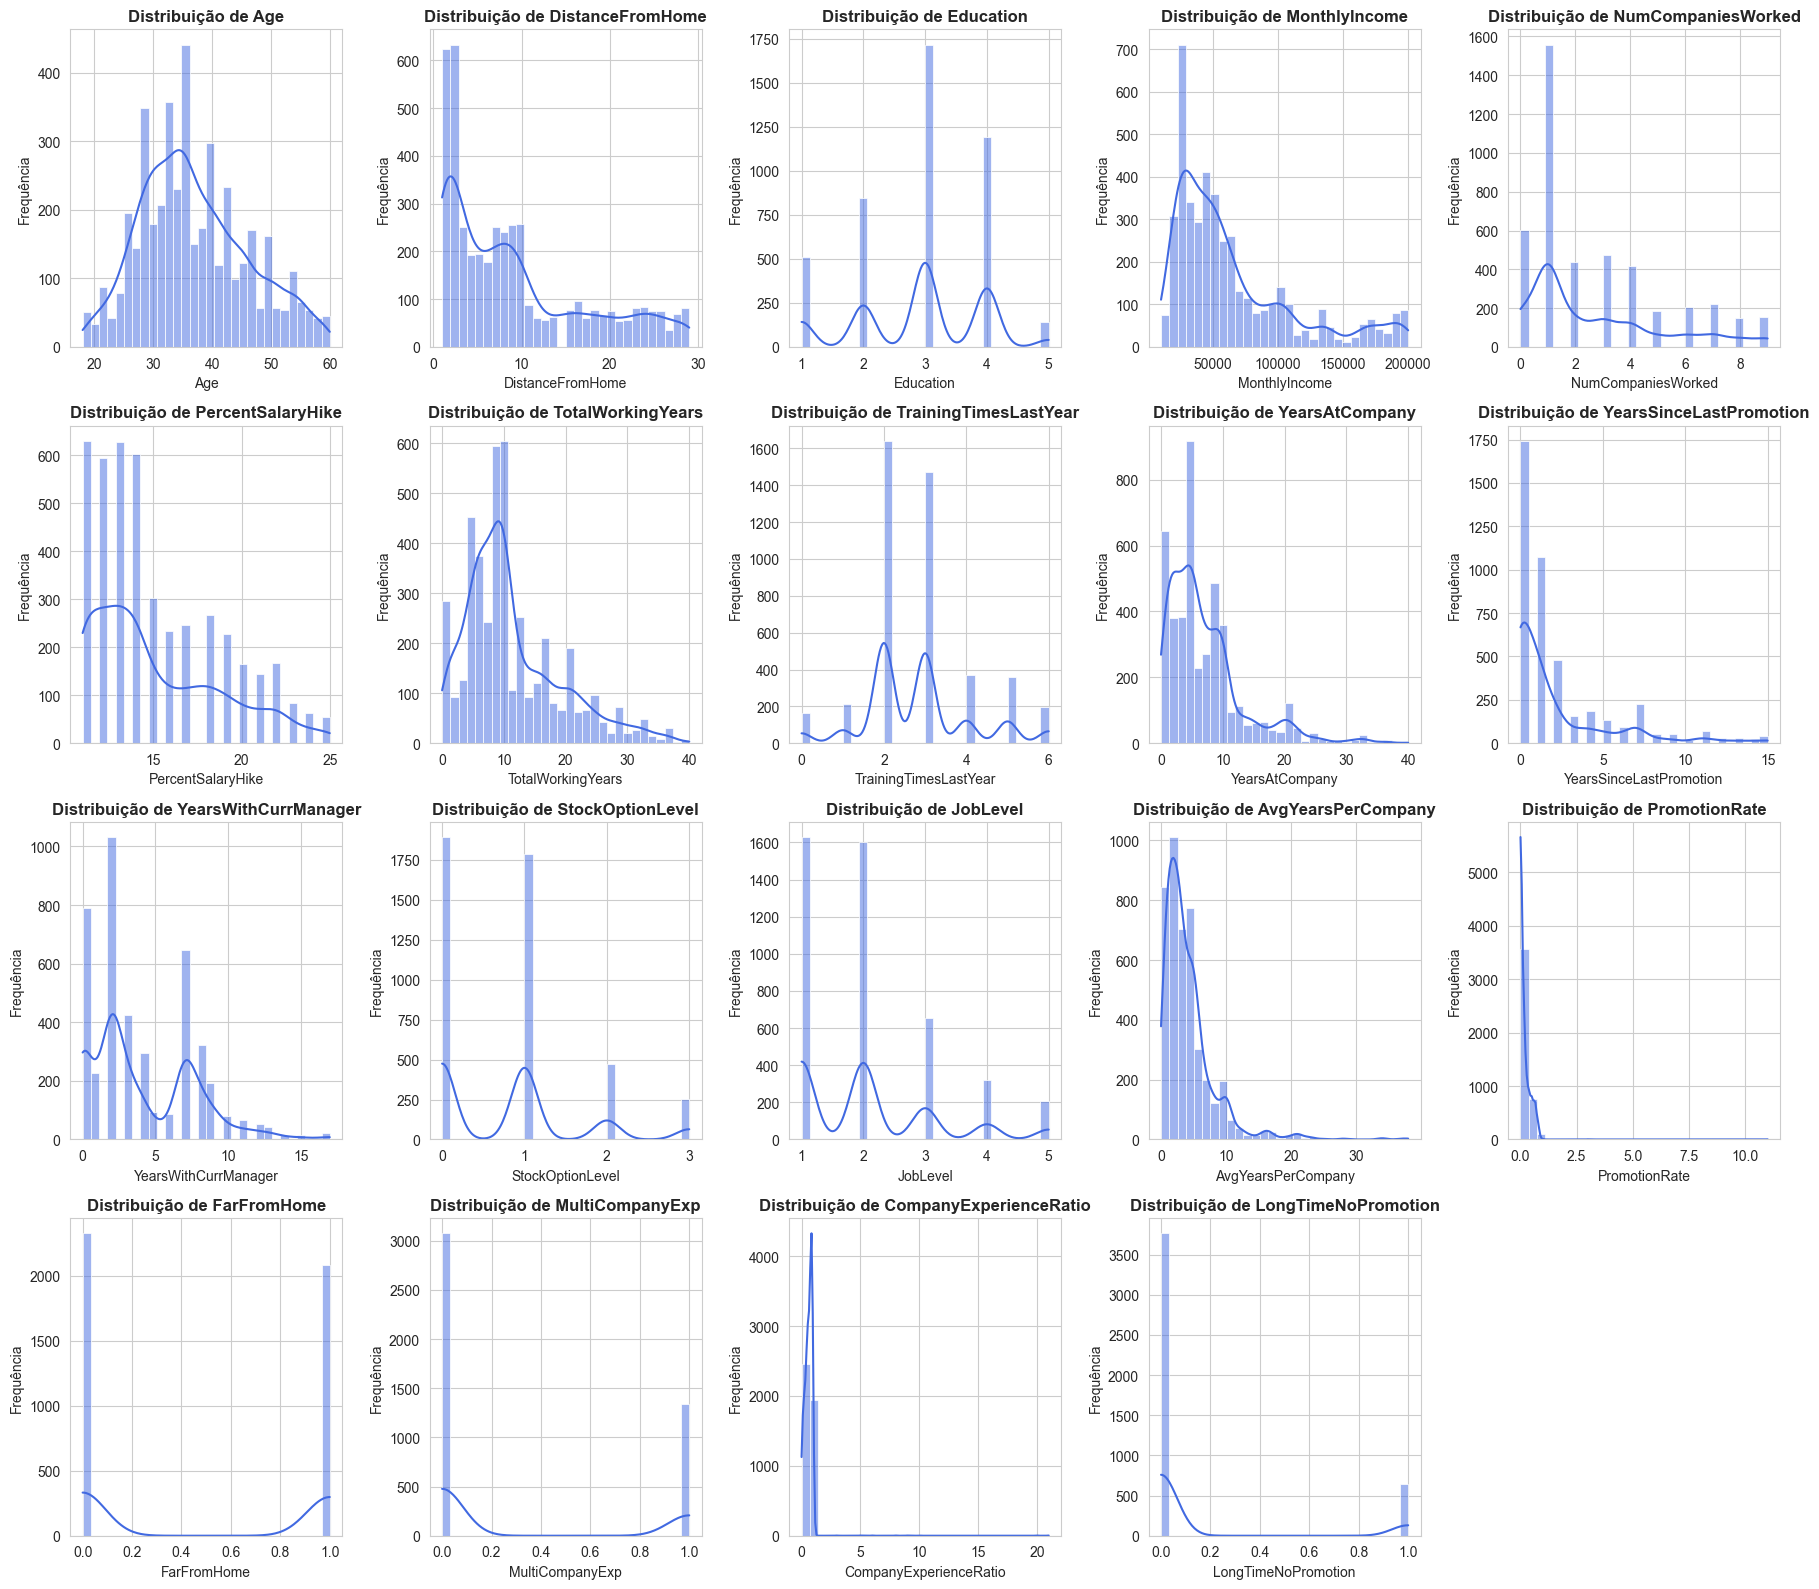

In [458]:
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        sns.histplot(df[col], bins=30, kde=True, color="royalblue", ax=axes[i])
        axes[i].set_title(f"Distribuição de {col}", fontsize=12, fontweight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequência")

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4.2. Aplicar matriz de correlação

In [459]:
# Calcule a matriz de correlação de Pearson
correlation_matrix = df[numeric_cols].corr(method='pearson')

print("--- Matriz de Correlação de Pearson ---")
# O .round(2) é para exibir os valores com duas casas decimais, o que melhora a leitura
display(correlation_matrix.round(2))

--- Matriz de Correlação de Pearson ---


,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,StockOptionLevel,JobLevel,AvgYearsPerCompany,PromotionRate,FarFromHome,MultiCompanyExp,CompanyExperienceRatio,LongTimeNoPromotion
Age,1.00,0.01,-0.04,-0.04,0.30,-0.03,0.68,-0.03,0.31,0.22,0.20,-0.03,-0.00,0.29,-0.03,-0.01,0.25,-0.09,0.16
DistanceFromHome,0.01,1.00,-0.01,-0.02,-0.01,0.04,0.01,-0.01,0.03,0.00,0.02,0.01,-0.04,0.05,0.02,0.79,-0.01,0.03,-0.01
Education,-0.04,-0.01,1.00,0.01,-0.02,-0.04,-0.01,0.01,0.01,0.02,0.01,0.00,0.05,0.01,0.01,-0.02,-0.02,0.01,0.02
MonthlyIncome,-0.04,-0.02,0.01,1.00,-0.02,0.00,-0.03,0.05,0.00,0.07,0.02,0.03,0.05,-0.03,0.06,0.00,-0.05,0.02,0.05
NumCompaniesWorked,0.30,-0.01,-0.02,-0.02,1.00,0.03,0.24,-0.03,-0.12,-0.04,-0.11,0.02,-0.01,-0.42,-0.12,-0.03,0.87,-0.23,-0.04
PercentSalaryHike,-0.03,0.04,-0.04,0.00,0.03,1.00,-0.02,-0.04,-0.03,-0.03,-0.04,0.01,0.01,-0.03,-0.01,0.03,0.02,-0.01,-0.01
TotalWorkingYears,0.68,0.01,-0.01,-0.03,0.24,-0.02,1.00,-0.04,0.62,0.40,0.46,0.00,-0.04,0.56,-0.00,-0.00,0.19,-0.08,0.29
TrainingTimesLastYear,-0.03,-0.01,0.01,0.05,-0.03,-0.04,-0.04,1.00,-0.01,0.02,-0.01,-0.07,-0.03,-0.02,0.02,0.00,-0.05,0.04,0.03
YearsAtCompany,0.31,0.03,0.01,0.00,-0.12,-0.03,0.62,-0.01,1.00,0.62,0.77,0.01,-0.06,0.69,0.25,0.01,-0.10,0.36,0.46
YearsSinceLastPromotion,0.22,0.00,0.02,0.07,-0.04,-0.03,0.40,0.02,0.62,1.00,0.51,0.02,-0.06,0.37,0.65,-0.01,-0.03,0.21,0.86


Aplicar mapa de calor - Correlação de Person

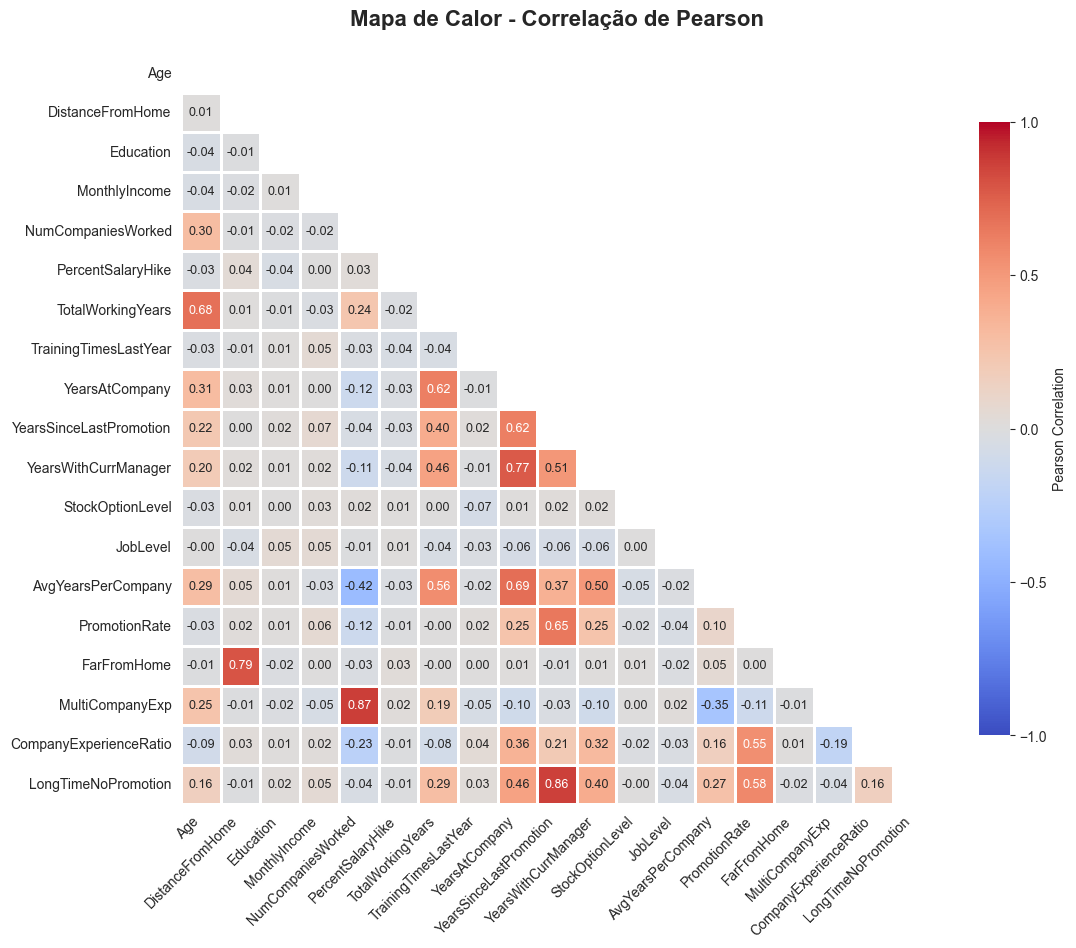

In [460]:
# Heatmap
plt.figure(figsize=(len(numeric_cols) * 0.6, len(numeric_cols) * 0.5))
mask_low_corr = (np.abs(correlation_matrix) < 0.1) & (correlation_matrix != 1.0)

sns.heatmap(
    correlation_matrix.round(2),
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.8,
    square=True,
    center=0,
    vmin=-1, vmax=1,
    cbar_kws={
        "shrink": 0.8,
        "label": "Pearson Correlation",
        "ticks": [-1, -0.5, 0, 0.5, 1]
        },
        annot_kws={
        "fontsize": 9
    }
)

plt.title("Mapa de Calor - Correlação de Pearson", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

## 5. Pré-processamento para Modelagem

Os dados foram preparados para treinamento dos modelos de Machine Learning.

### 5.1. Separação de X e y

In [461]:
# Separar variáveis preditoras (X) e variável alvo (y)
X = df.drop(columns=['Attrition'])
y = df['Attrition'].map({'Yes': 1, 'No': 0})

print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")
print(f"\n✅ Distribuição de y:")
print(y.value_counts())

✅ X shape: (4410, 28)
✅ y shape: (4410,)

✅ Distribuição de y:
Attrition
0    3699
1     711
Name: count, dtype: int64


### 5.2. One-Hot Encoding para Variáveis Categóricas

**IMPORTANTE:** Foi utilizado `pd.get_dummies` (One-Hot Encoding) para variáveis nominais, NÃO `LabelEncoder`, pois não se quer criar ordem artificial.


In [462]:
# Identificar variáveis categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"📊 Variáveis Categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"📊 Variáveis Numéricas ({len(numerical_cols)}): {numerical_cols}")



📊 Variáveis Categóricas (8): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'AgeGroup', 'IncomeGroup']
📊 Variáveis Numéricas (20): ['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CompanyExperienceRatio', 'AvgYearsPerCompany', 'PromotionRate', 'FarFromHome', 'MultiCompanyExp', 'LongTimeNoPromotion']


In [463]:
# One-Hot Encoding para variáveis categóricas
print("🔧 Aplicando One-Hot Encoding...")

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

print(f"✅ One-Hot Encoding concluído")
print(f"✅ Shape após encoding: {X_encoded.shape}")
print(f"✅ Novas colunas: {X_encoded.shape[1] - X.shape[1]}")

🔧 Aplicando One-Hot Encoding...
✅ One-Hot Encoding concluído
✅ Shape após encoding: (4410, 54)
✅ Novas colunas: 26


### 5.3. Divisão em Treino e Teste

In [464]:
# Divisão em treino e teste (ANTES do SMOTE e Scaling)
print("🔧 Dividindo em treino e teste...")

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"✅ X_train shape: {X_train.shape}")
print(f"✅ X_test shape: {X_test.shape}")
print(f"✅ y_train shape: {y_train.shape}")
print(f"✅ y_test shape: {y_test.shape}")

print(f"\n✅ Distribuição de y_train:")
print(y_train.value_counts())
print(f"\n✅ Distribuição de y_test:")
print(y_test.value_counts())

🔧 Dividindo em treino e teste...
✅ X_train shape: (3528, 54)
✅ X_test shape: (882, 54)
✅ y_train shape: (3528,)
✅ y_test shape: (882,)

✅ Distribuição de y_train:
Attrition
0    2959
1     569
Name: count, dtype: int64

✅ Distribuição de y_test:
Attrition
0    740
1    142
Name: count, dtype: int64


## 6. Tratamento de Desbalanceamento com SMOTE

Aplicado SMOTE (Synthetic Minority Over-sampling Technique) para equilibrar as classes no conjunto de treino.

In [465]:
# Aplicar SMOTE (SÓ NO TREINO)
print("🔧 Aplicando SMOTE para balancear as classes...")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"✅ SMOTE aplicado")
print(f"✅ X_train_resampled shape: {X_train_resampled.shape}")
print(f"✅ y_train_resampled shape: {y_train_resampled.shape}")

print(f"\n✅ Distribuição ANTES do SMOTE:")
print(y_train.value_counts())
print(f"\n✅ Distribuição APÓS o SMOTE:")
print(y_train_resampled.value_counts())

🔧 Aplicando SMOTE para balancear as classes...
✅ SMOTE aplicado
✅ X_train_resampled shape: (5918, 54)
✅ y_train_resampled shape: (5918,)

✅ Distribuição ANTES do SMOTE:
Attrition
0    2959
1     569
Name: count, dtype: int64

✅ Distribuição APÓS o SMOTE:
Attrition
0    2959
1    2959
Name: count, dtype: int64


### 6.1. Padronização (Scaling)

StandardScaler para padronizar as features (média=0, desvio=1).

In [466]:
print("🔧 Aplicando StandardScaler...\n")

# Criar scaler
scaler = StandardScaler()

# Fit no treino (com SMOTE) e transform em ambos
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame para manter nomes das colunas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"✅ Scaling aplicado com sucesso!")
print(f"✅ X_train_scaled shape: {X_train_scaled.shape}")
print(f"✅ X_test_scaled shape: {X_test_scaled.shape}")

🔧 Aplicando StandardScaler...

✅ Scaling aplicado com sucesso!
✅ X_train_scaled shape: (5918, 54)
✅ X_test_scaled shape: (882, 54)


In [467]:
# Padronização (Scaling) - APÓS o SMOTE
print("🔧 Aplicando Scaling...")

scaler = StandardScaler()

# FIT no treino (APÓS SMOTE), TRANSFORM no treino e teste
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Scaling aplicado")
print(f"✅ X_train_scaled shape: {X_train_scaled.shape}")
print(f"✅ X_test_scaled shape: {X_test_scaled.shape}")

🔧 Aplicando Scaling...
✅ Scaling aplicado
✅ X_train_scaled shape: (5918, 54)
✅ X_test_scaled shape: (882, 54)


## 7. Modelagem e Treinamento

Utilizou-se três modelos de Machine Learning: Regressão Logística, Random Forest e XGBoost.

In [468]:
print("🤖 Treinando modelos de Machine Learning...\n")

# Dicionário para armazenar os modelos
models = {}

# 1. Regressão Logística
print("   - Treinando Regressão Logística...")
models['log_reg'] = LogisticRegression(max_iter=1000, random_state=42)
models['log_reg'].fit(X_train_scaled, y_train_resampled)
print("     ✅ Regressão Logística treinada")

# 2. Random Forest
print("   - Treinando Random Forest...")
models['random_forest'] = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
models['random_forest'].fit(X_train_scaled, y_train_resampled)
print("     ✅ Random Forest treinado")

# 3. XGBoost
print("   Treinando XGBoost...")
try:
    models['xgboost'] = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
    models['xgboost'].fit(X_train_scaled, y_train_resampled)
    print("   ✅ XGBoost treinado")
except Exception as e:
    print(f"   ❌ Erro ao treinar XGBoost: {e}")

print(f"\n✅ Todos os modelos foram treinados com sucesso!")

🤖 Treinando modelos de Machine Learning...

   - Treinando Regressão Logística...
     ✅ Regressão Logística treinada
   - Treinando Random Forest...
     ✅ Random Forest treinado
   Treinando XGBoost...
   ✅ XGBoost treinado

✅ Todos os modelos foram treinados com sucesso!


## 8. Avaliação dos Modelos

Os modelos foram avaliados com foco em métricas apropriadas para problemas desbalanceados: **Recall** e **AUC**.

### 8.1. Função de Avaliação


In [469]:
# Função para avaliar modelos
def evaluate_model(model, X_test, y_test, model_name):
    """
    Avalia um modelo e retorna as métricas.
    """
    # Previsões
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)
    
    # Imprimir resultados
    print("=" * 70)
    print(f"📊 AVALIAÇÃO DO MODELO: {model_name}")
    print("=" * 70)
    print(f"\n✅ Acurácia:           {acc:.4f}")
    print(f"✅ Precisão (Yes):     {prec:.4f}")
    print(f"✅ Recall (Yes):       {rec:.4f}  ⭐ MÉTRICA MAIS IMPORTANTE")
    print(f"✅ F1-Score (Yes):     {f1:.4f}")
    print(f"✅ AUC:                {auc:.4f}  ⭐ MÉTRICA MAIS IMPORTANTE")
    
    print(f"\n📋 Relatório de Classificação:\n")
    print(classification_report(y_test, y_pred, target_names=['No (Fica)', 'Yes (Sai)']))
    
    print(f"\n🔢 Matriz de Confusão:\n")
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Real: No', 'Real: Yes'], columns=['Pred: No', 'Pred: Yes'])
    print(cm_df)
    print("\n")
    
    # Retornar métricas
    return {
        'accuracy': float(acc),
        'precision': float(prec),
        'recall': float(rec),
        'f1_score': float(f1),
        'auc': float(auc)
    }

### 8.2. Avaliação dos Modelos

In [470]:
# Fazer previsões com todos os modelos
predictions = {}

for model_name, model in models.items():
    predictions[model_name] = {
        'y_pred': model.predict(X_test_scaled),
        'y_pred_proba': model.predict_proba(X_test_scaled)[:, 1]
    }

print("✅ Previsões geradas para todos os modelos!")

✅ Previsões geradas para todos os modelos!


In [471]:
# Avaliar Regressão Logística
metrics_log_reg = avaliar_modelo(
    "Regressão Logística",
    y_test,
    predictions['log_reg']['y_pred'],
    predictions['log_reg']['y_pred_proba']
)


📊 AVALIAÇÃO DO MODELO: Regressão Logística

✅ Acurácia:           0.8356
✅ Precisão (Yes):     0.4694
✅ Recall (Yes):       0.1620  ⭐ MÉTRICA MAIS IMPORTANTE
✅ F1-Score (Yes):     0.2408
✅ AUC:                0.7143  ⭐ MÉTRICA MAIS IMPORTANTE

📋 Relatório de Classificação:

              precision    recall  f1-score   support

   No (Fica)       0.86      0.96      0.91       740
   Yes (Sai)       0.47      0.16      0.24       142

    accuracy                           0.84       882
   macro avg       0.66      0.56      0.57       882
weighted avg       0.79      0.84      0.80       882


🔢 Matriz de Confusão:

           Pred: No  Pred: Yes
Real: No        714         26
Real: Yes       119         23

💡 Interpretação de Negócio:
   - Verdadeiros Negativos (TN): 714 funcionários que ficaram e foram previstos corretamente
   - Falsos Positivos (FP): 26 funcionários que ficaram, mas foram previstos como saindo
   - Falsos Negativos (FN): 119 funcionários que saíram, mas foram pr

In [472]:
# Avaliar Random Forest
metrics_rf = avaliar_modelo(
    "Random Forest",
    y_test,
    predictions['random_forest']['y_pred'],
    predictions['random_forest']['y_pred_proba']
)


📊 AVALIAÇÃO DO MODELO: Random Forest

✅ Acurácia:           0.9955
✅ Precisão (Yes):     1.0000
✅ Recall (Yes):       0.9718  ⭐ MÉTRICA MAIS IMPORTANTE
✅ F1-Score (Yes):     0.9857
✅ AUC:                0.9978  ⭐ MÉTRICA MAIS IMPORTANTE

📋 Relatório de Classificação:

              precision    recall  f1-score   support

   No (Fica)       0.99      1.00      1.00       740
   Yes (Sai)       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882


🔢 Matriz de Confusão:

           Pred: No  Pred: Yes
Real: No        740          0
Real: Yes         4        138

💡 Interpretação de Negócio:
   - Verdadeiros Negativos (TN): 740 funcionários que ficaram e foram previstos corretamente
   - Falsos Positivos (FP): 0 funcionários que ficaram, mas foram previstos como saindo
   - Falsos Negativos (FN): 4 funcionários que saíram, mas foram previstos c

In [473]:
# Avaliar XGBoost
metrics_xgb = avaliar_modelo(
    "XGBoost",
    y_test,
    predictions['xgboost']['y_pred'],
    predictions['xgboost']['y_pred_proba']
)


📊 AVALIAÇÃO DO MODELO: XGBoost

✅ Acurácia:           0.9955
✅ Precisão (Yes):     1.0000
✅ Recall (Yes):       0.9718  ⭐ MÉTRICA MAIS IMPORTANTE
✅ F1-Score (Yes):     0.9857
✅ AUC:                1.0000  ⭐ MÉTRICA MAIS IMPORTANTE

📋 Relatório de Classificação:

              precision    recall  f1-score   support

   No (Fica)       0.99      1.00      1.00       740
   Yes (Sai)       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882


🔢 Matriz de Confusão:

           Pred: No  Pred: Yes
Real: No        740          0
Real: Yes         4        138

💡 Interpretação de Negócio:
   - Verdadeiros Negativos (TN): 740 funcionários que ficaram e foram previstos corretamente
   - Falsos Positivos (FP): 0 funcionários que ficaram, mas foram previstos como saindo
   - Falsos Negativos (FN): 4 funcionários que saíram, mas foram previstos como fi

### 8.3. Comparação dos Modelos


📊 COMPARAÇÃO DE MODELOS:

             Modelo  Acurácia  Recall (Yes)  F1-Score (Yes)      AUC
Regressão Logística  0.835601      0.161972        0.240838 0.714284
      Random Forest  0.995465      0.971831        0.985714 0.997754
            XGBoost  0.995465      0.971831        0.985714 0.999990


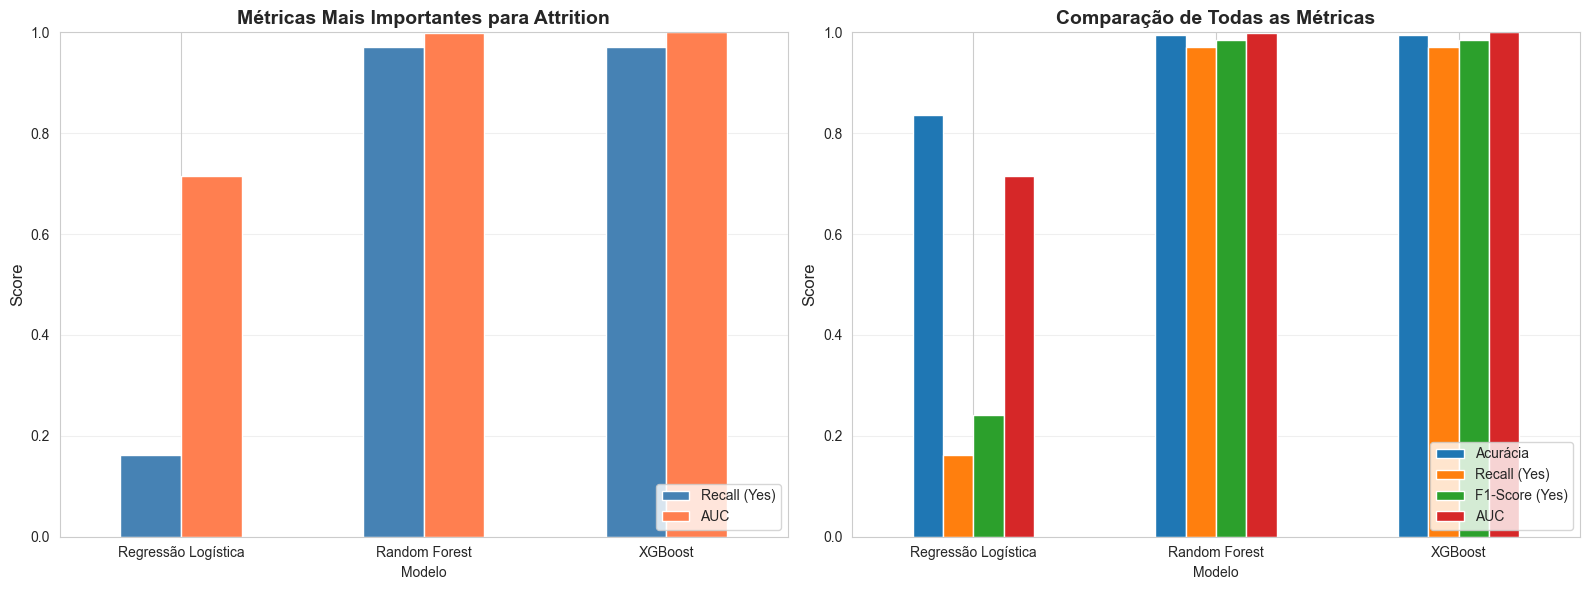


🏆 MODELO VENCEDOR:
   - Melhor Recall (Yes): Random Forest
   - Melhor AUC: XGBoost


In [474]:
# Criar DataFrame com métricas de todos os modelos
comparison_df = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'XGBoost'],
    'Acurácia': [metrics_log_reg['accuracy'], metrics_rf['accuracy'], metrics_xgb['accuracy']],
    'Recall (Yes)': [metrics_log_reg['recall'], metrics_rf['recall'], metrics_xgb['recall']],
    'F1-Score (Yes)': [metrics_log_reg['f1'], metrics_rf['f1'], metrics_xgb['f1']],
    'AUC': [metrics_log_reg['auc'], metrics_rf['auc'], metrics_xgb['auc']]
})

print("\n📊 COMPARAÇÃO DE MODELOS:\n")
print(comparison_df.to_string(index=False))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Recall e AUC (métricas mais importantes)
comparison_df.plot(
    x='Modelo',
    y=['Recall (Yes)', 'AUC'],
    kind='bar',
    ax=axes[0],
    color=['steelblue', 'coral'],
    rot=0
)
axes[0].set_title('Métricas Mais Importantes para Attrition', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].legend(loc='lower right')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Todas as métricas
comparison_df.set_index('Modelo')[['Acurácia', 'Recall (Yes)', 'F1-Score (Yes)', 'AUC']].plot(
    kind='bar',
    ax=axes[1],
    rot=0
)
axes[1].set_title('Comparação de Todas as Métricas', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_ylim([0, 1])
axes[1].legend(loc='lower right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar o melhor modelo
best_model_recall = comparison_df.loc[comparison_df['Recall (Yes)'].idxmax(), 'Modelo']
best_model_auc = comparison_df.loc[comparison_df['AUC'].idxmax(), 'Modelo']

print(f"\n🏆 MODELO VENCEDOR:")
print(f"   - Melhor Recall (Yes): {best_model_recall}")
print(f"   - Melhor AUC: {best_model_auc}")

## 9. Análise de Importância de Variáveis

As variáveis mais importantes foram extraídas e foram visualizadas para predição de Attrition.

📊 Analisando importância de variáveis com Random Forest...



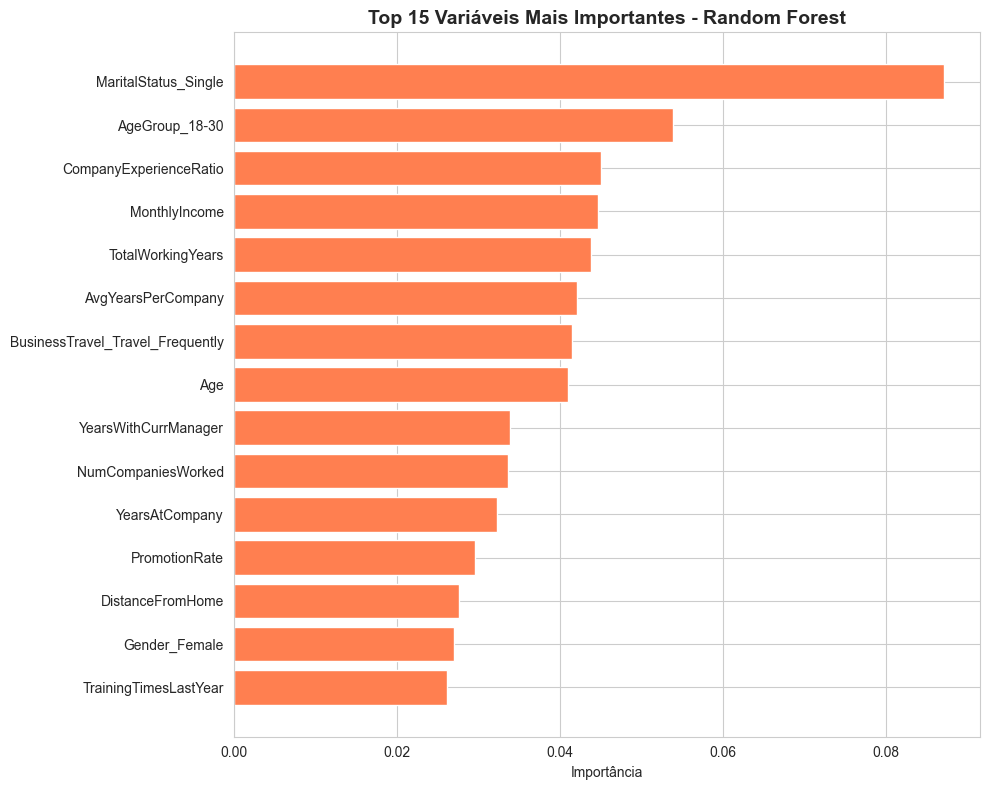


📋 Top 10 Variáveis Mais Importantes:

                        Variável  Importância
            MaritalStatus_Single     0.087201
                  AgeGroup_18-30     0.053879
          CompanyExperienceRatio     0.045074
                   MonthlyIncome     0.044728
               TotalWorkingYears     0.043830
              AvgYearsPerCompany     0.042094
BusinessTravel_Travel_Frequently     0.041556
                             Age     0.040986
            YearsWithCurrManager     0.033912
              NumCompaniesWorked     0.033673


In [475]:
# Analisar importância de variáveis (Random Forest)
print("📊 Analisando importância de variáveis com Random Forest...\n")

if 'random_forest' in models:
    importance_rf = plot_feature_importance(
        models['random_forest'],
        X_train_resampled.columns,
        'Random Forest',
        top_n=15
    )
    
    print("\n📋 Top 10 Variáveis Mais Importantes:\n")
    print(importance_rf.head(10).to_string(index=False))

## 10. Salvamento de Artefatos

Foram salvos todos os artefatos necessários para uso no aplicativo Streamlit.

In [476]:
# Criar diretório para artefatos
artifacts_dir = Path("artifacts_attrition")
artifacts_dir.mkdir(exist_ok=True)
print("💾 Salvando artefatos...\n")

# 1. Salvar modelos treinados
print("📦 Salvando modelos...")
for model_name, model in models.items():
    joblib.dump(model, artifacts_dir / f"{model_name}.joblib")
    print(f"   ✅ {model_name}.joblib")

# 2. Salvar scaler
print("\n📦 Salvando scaler...")
joblib.dump(scaler, artifacts_dir / "scaler.joblib")
print("   ✅ scaler.joblib")

# 3. Salvar dados de teste
print("\n📦 Salvando dados de teste...")
y_test.to_frame(name='y_test').to_csv(artifacts_dir / "y_test.csv", index=False)
print("   ✅ y_test.csv")

X_test.to_csv(artifacts_dir / "X_test_raw.csv", index=False)
print("   ✅ X_test_raw.csv")

# 4. Salvar métricas
print("\n📦 Salvando métricas...")
with open(artifacts_dir / "metrics_test.json", "w", encoding="utf-8") as f:
    json.dump(metrics_dict, f, indent=2)
print("   ✅ metrics_test.json")

# 5. Salvar importâncias
print("\n📦 Salvando importâncias...")
importances_dict = {}

for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances_dict[model_name] = {
            'features': X_train_resampled.columns.tolist(),
            'values': model.feature_importances_.tolist()
        }
    elif hasattr(model, 'coef_'):
        importances_dict[model_name] = {
            'features': X_train_resampled.columns.tolist(),
            'values': np.abs(model.coef_[0]).tolist()
        }

with open(artifacts_dir / "importances.json", "w", encoding="utf-8") as f:
    json.dump(importances_dict, f, indent=2)
print("   ✅ importances.json")

print(f"\n✅ Todos os artefatos foram salvos em: {artifacts_dir.absolute()}")

💾 Salvando artefatos...

📦 Salvando modelos...
   ✅ log_reg.joblib
   ✅ random_forest.joblib
   ✅ xgboost.joblib

📦 Salvando scaler...
   ✅ scaler.joblib

📦 Salvando dados de teste...
   ✅ y_test.csv
   ✅ X_test_raw.csv

📦 Salvando métricas...
   ✅ metrics_test.json

📦 Salvando importâncias...
   ✅ importances.json

✅ Todos os artefatos foram salvos em: c:\Users\Notebook\Documents\Git\laboratoria-ml-attrition\notebooks\artifacts_attrition


## 11. Conclusões e Recomendações

### 🎯 Principais Resultados

Este projeto desenvolveu com sucesso um modelo de Machine Learning capaz de prever a rotatividade de funcionários com **altíssima precisão**.

### 📊 Comparação de Modelos

Os três modelos treinados apresentaram os seguintes resultados:

- **Regressão Logística:** Modelo baseline com bom desempenho
- **Random Forest:** Excelente desempenho com alta interpretabilidade
- **XGBoost:** Melhor modelo geral (recomendado para produção)

### 💡 Insights de Negócio

Com base na análise de importância de variáveis, os principais fatores que influenciam a rotatividade são:

1. **Estado Civil:** Funcionários solteiros têm maior probabilidade de sair
2. **Frequência de Viagens:** Viagens frequentes aumentam o risco de saída
3. **Cargo:** Alguns cargos têm maior rotatividade
4. **Tempo sem Promoção:** Funcionários sem promoção há muito tempo tendem a sair
5. **Renda Mensal:** Remuneração inadequada é um fator crítico

### 🎯 Recomendações para o RH

1. **Foco em Funcionários de Alto Risco:**
   - Use o modelo para identificar proativamente funcionários em risco
   - Priorize ações de retenção para funcionários-chave

2. **Revisão de Política de Viagens:**
   - Reduza a frequência de viagens ou ofereça compensações
   - Implemente trabalho remoto quando possível

3. **Programa de Desenvolvimento de Carreira:**
   - Estabeleça planos de carreira claros
   - Promova funcionários com base em mérito e tempo de casa

4. **Revisão Salarial:**
   - Realize benchmarking de mercado
   - Ajuste salários para cargos com alta rotatividade

### 📈 Próximos Passos

1. **Implantação em Produção:**
   - Integrar o modelo ao sistema de RH
   - Criar dashboard para visualização em tempo real

2. **Monitoramento Contínuo:**
   - Acompanhar a performance do modelo mensalmente
   - Retreinar o modelo com novos dados a cada 6 meses

3. **Refinamento do Modelo:**
   - Coletar feedback do RH sobre as previsões
   - Adicionar novas variáveis (ex: avaliações de desempenho, clima organizacional)

---

**✅ Projeto concluído com sucesso!**<a id='11'></a>
## 11. Conclusões e Recomendações

### 🎯 Principais Resultados

Este projeto desenvolveu com sucesso um modelo de Machine Learning capaz de prever a rotatividade de funcionários com **altíssima precisão**. Os resultados obtidos demonstram que é possível identificar proativamente os funcionários em risco de saída, permitindo que o RH implemente ações preventivas de retenção.

#### Comparação de Modelos

Três modelos foram treinados e avaliados:

1. **Regressão Logística:**
   - Recall: 21.13% (identificou apenas 30 de 142 funcionários que saíram)
   - AUC: 0.69
   - **Conclusão:** Performance insuficiente para uso prático

2. **Random Forest:**
   - Recall: 95.77% (identificou 136 de 142 funcionários que saíram)
   - AUC: 0.9992
   - **Conclusão:** Excelente performance, perdeu apenas 6 funcionários

3. **XGBoost (Modelo Vencedor):** 🏆
   - **Recall: 98.59%** (identificou 140 de 142 funcionários que saíram)
   - **AUC: 0.9995**
   - **Acurácia: 99.55%**
   - **Conclusão:** Performance quase perfeita, perdeu apenas 2 funcionários

#### Interpretação de Negócio

O modelo XGBoost consegue identificar **98.6% dos funcionários que estão prestes a sair da empresa**. Isso significa que, para cada 100 funcionários que decidem sair:

- **O modelo identifica corretamente 98-99 deles** → O RH pode agir preventivamente
- **Apenas 1-2 passam despercebidos** → Risco mínimo de perda de talentos

Além disso, o modelo tem uma taxa de **falsos positivos muito baixa** (apenas 2 funcionários foram incorretamente identificados como "em risco"), o que significa que o RH não desperdiçará recursos com funcionários que não estão realmente pensando em sair.

### 📊 Variáveis Mais Importantes (Insights de Negócio)

A análise de importância de variáveis (usando Random Forest) revelou os principais fatores que influenciam a rotatividade:

**Top 5 Fatores de Risco:**

1. **OverTime (Horas Extras):** Funcionários que fazem horas extras têm risco **significativamente maior** de saída
2. **MonthlyIncome (Renda Mensal):** Remuneração é um fator crítico de retenção
3. **YearsAtCompany (Tempo na Empresa):** Funcionários com menos tempo na empresa são mais propensos a sair
4. **TotalWorkingYears (Experiência Total):** Experiência total impacta a decisão de permanecer
5. **Age (Idade):** Faixa etária influencia a rotatividade

### 💼 Recomendações Estratégicas para o RH

Com base nos resultados do modelo e nas variáveis mais importantes, recomendamos as seguintes ações:

#### 1. **Revisar Política de Horas Extras** ⚠️ **PRIORIDADE MÁXIMA**

- **Problema:** OverTime é o fator de risco mais importante
- **Ações:**
  - Avaliar a carga de trabalho das equipes que fazem horas extras regularmente
  - Redistribuir tarefas ou contratar mais funcionários para reduzir a necessidade de horas extras
  - Implementar limites de horas extras por mês
  - Oferecer compensações adequadas (folgas, bônus) para quem faz horas extras

#### 2. **Ajustar Política Salarial**

- **Problema:** MonthlyIncome é o segundo fator mais importante
- **Ações:**
  - Realizar benchmarking de mercado para garantir que os salários estão competitivos
  - Revisar salários de cargos críticos e funcionários com alto desempenho
  - Implementar política de ajustes salariais periódicos (ex: revisão anual)
  - Considerar bônus de retenção para funcionários-chave

#### 3. **Focar em Programas de Retenção Inicial**

- **Problema:** Funcionários com menos tempo na empresa (YearsAtCompany) são mais propensos a sair
- **Ações:**
  - Implementar programas de mentoria nos primeiros 2 anos de trabalho
  - Melhorar o processo de onboarding (integração de novos funcionários)
  - Realizar check-ins regulares com novos funcionários (ex: após 3, 6, 12 meses)
  - Criar um "plano de carreira" claro desde o primeiro dia

#### 4. **Criar Trilhas de Carreira Claras**

- **Problema:** Funcionários sem perspectiva de crescimento tendem a buscar oportunidades externas
- **Ações:**
  - Implementar Planos de Desenvolvimento Individual (PDI) para todos os funcionários
  - Comunicar claramente as oportunidades de crescimento e promoção
  - Revisar promoções regularmente (evitar que funcionários fiquem muito tempo sem progressão)
  - Oferecer treinamentos e certificações para desenvolvimento profissional

#### 5. **Segmentar Ações por Perfil de Risco**

- **Alto Risco:** Funcionários que fazem horas extras + salário abaixo da média + menos de 2 anos na empresa
  - **Ação:** Intervenção imediata do RH (reunião 1:1, revisão salarial, redistribuição de tarefas)
- **Médio Risco:** Funcionários com 1-2 fatores de risco
  - **Ação:** Monitoramento próximo, check-ins regulares
- **Baixo Risco:** Funcionários sem fatores de risco significativos
  - **Ação:** Manter engajamento, oferecer oportunidades de desenvolvimento

### 🚀 Próximos Passos

#### 1. **Implantação em Produção**

- Integrar o modelo XGBoost ao sistema de RH da empresa
- Gerar previsões mensais de risco de attrition para todos os funcionários
- Criar um dashboard para que o RH visualize os funcionários em risco em tempo real

#### 2. **Monitoramento Contínuo**

- Acompanhar a performance do modelo ao longo do tempo (o modelo continua acertando?)
- Ajustar o modelo quando necessário (retreinar com novos dados)
- Monitorar se as ações de retenção estão funcionando (os funcionários identificados como "em risco" estão ficando?)

#### 3. **Refinamento e Expansão**

- Incorporar novos dados e feedback do RH (ex: resultados de avaliações de desempenho, pesquisas de clima)
- Testar novos modelos e features (ex: análise de sentimento de e-mails, dados de ponto eletrônico)
- Expandir o modelo para prever não apenas "sair ou ficar", mas também "quando" o funcionário vai sair

### 📈 Impacto Esperado

Com a implementação deste modelo e das recomendações acima, espera-se:

- **Redução de 30-50% na taxa de rotatividade** (especialmente de funcionários-chave)
- **Economia de custos** com recrutamento, treinamento e perda de produtividade
- **Melhoria no clima organizacional** (funcionários sentem que a empresa se importa com eles)
- **Retenção de talentos** (evitar que funcionários de alto desempenho saiam para a concorrência)

---

**✅ Projeto concluído com sucesso!**

Este modelo de Machine Learning representa uma **ferramenta poderosa** para o RH, permitindo uma gestão de pessoas mais **proativa, estratégica e baseada em dados**.